<a href="https://colab.research.google.com/github/W-Srikongpan/Multivariate_Analysis/blob/main/chapter5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Principal component analysis (PCA)

#Install packages

In [1]:
install.packages(c("ggplot2","factoextra"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘later’, ‘lazyeval’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘htmlwidgets’, ‘httpuv’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘Rcpp’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’




#Import library

In [99]:
library("ggplot2")
library("factoextra")
library("corrplot")
library("FactoMineR")

# Create Data

In [100]:
data(decathlon2)
head(decathlon2)

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,X1500m,Rank,Points,Competition
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar
ZSIVOCZKY,11.13,7.30,13.48,2.01,48.62,14.17,45.67,4.42,55.37,268.0,7,8004,Decastar
McMULLEN,10.83,7.31,13.76,2.13,49.91,14.38,44.41,4.42,56.37,285.1,8,7995,Decastar


We start by subsetting active individuals (1st - 23rd persons) and active variables ( 1st - 10th variables) for the principal component analysis

In [101]:
decathlon2.active = decathlon2[1:23, 1:10]
head(decathlon2.active[, 1:6], 4)

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69
CLAY,10.76,7.40,14.26,1.86,49.37,14.05
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31


Explore data

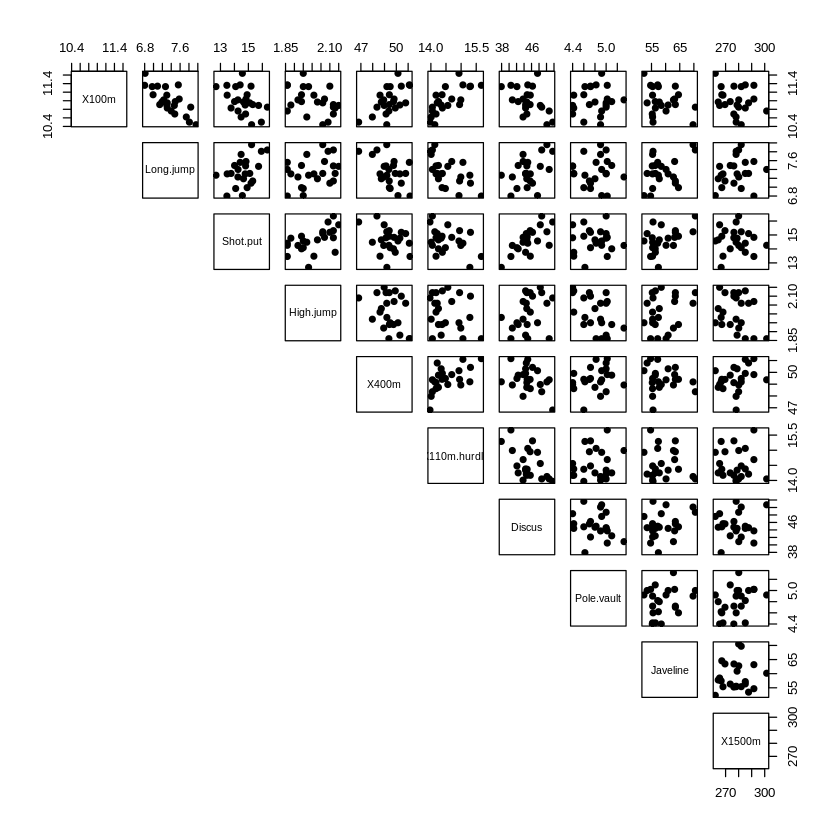

In [102]:
pairs(decathlon2.active[,1:10], pch = 19, lower.panel = NULL)

Conducting PCA by prcomp() with standardization (Based on correlation matrix)

In [103]:
res.pca = prcomp(decathlon2.active, scale = TRUE)
print(summary(res.pca))

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.0308 1.3559 1.1132 0.90523 0.83759 0.65029 0.55007
Proportion of Variance 0.4124 0.1839 0.1239 0.08194 0.07016 0.04229 0.03026
Cumulative Proportion  0.4124 0.5963 0.7202 0.80213 0.87229 0.91458 0.94483
                           PC8     PC9   PC10
Standard deviation     0.52390 0.39398 0.3492
Proportion of Variance 0.02745 0.01552 0.0122
Cumulative Proportion  0.97228 0.98780 1.0000


In [104]:
get_eigenvalue(res.pca)

,eigenvalue,variance.percent,cumulative.variance.percent
,<dbl>,<dbl>,<dbl>
Dim.1,4.1242133,41.242133,41.24213
Dim.2,1.8385309,18.385309,59.62744
Dim.3,1.2391403,12.391403,72.01885
Dim.4,0.8194402,8.194402,80.21325
Dim.5,0.7015528,7.015528,87.22878
Dim.6,0.4228828,4.228828,91.45760
Dim.7,0.3025817,3.025817,94.48342
Dim.8,0.2744700,2.744700,97.22812
Dim.9,0.1552169,1.552169,98.78029


The scree plot can be produced using the function fviz_eig() or fviz_screeplot()

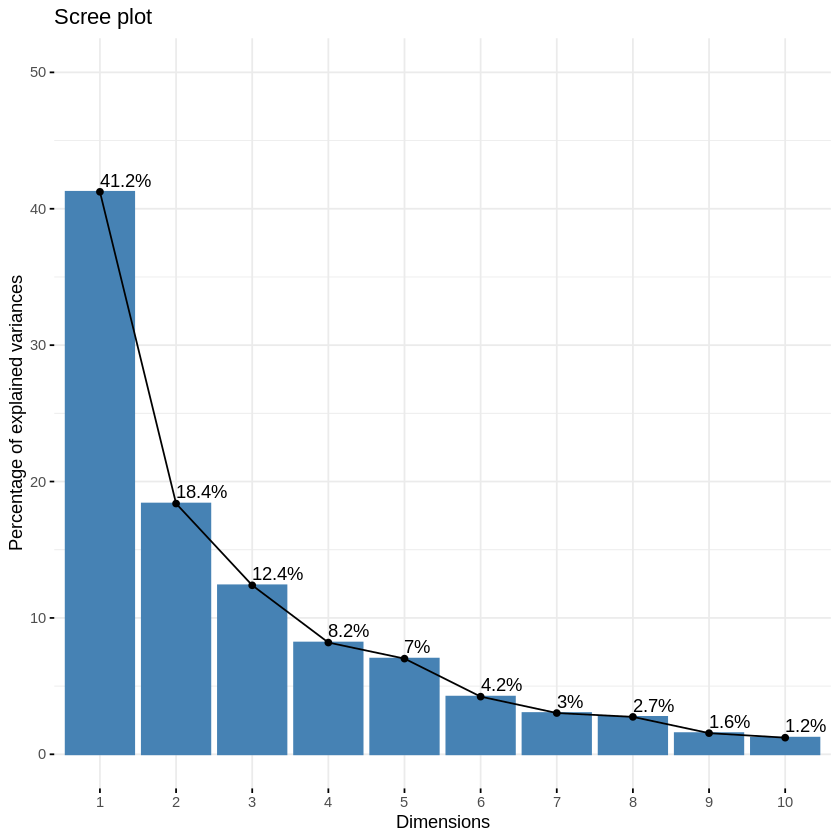

In [105]:
fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 50))

##Graph of variables

In [106]:
var = get_pca_var(res.pca)
var$coord

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
X100m,-0.850625692,-0.17939806,-0.30155643,0.03357320,-0.1944440,-0.035374780,-0.091336386,-0.104716925,-0.30306448,0.044417974
Long.jump,0.794180641,0.28085695,0.19054653,-0.11538956,0.2331567,0.033727883,-0.154330810,-0.397380703,-0.05158951,0.029719453
Shot.put,0.733912733,0.08540412,-0.51759781,0.12846837,-0.2488129,0.239789034,-0.009886612,0.024359049,0.04778655,0.217451948
High.jump,0.610083985,-0.46521415,-0.33008517,0.14455012,0.4027002,0.284644846,0.028157465,0.084405578,-0.11213822,-0.133566774
X400m,-0.701603377,0.29017826,-0.28353292,0.43082552,0.1039085,0.049289996,0.286106008,-0.233552216,0.08216041,-0.034170673
X110m.hurdle,-0.764125197,-0.02474081,-0.44888733,-0.01689589,0.2242200,-0.002632395,-0.370072158,-0.008344682,0.16176025,-0.015629914
Discus,0.743209016,0.04966086,-0.17652518,0.39500915,-0.4082391,-0.198544870,-0.142725641,-0.039559255,0.01336209,-0.172590426
Pole.vault,-0.217268042,0.80745110,-0.09405773,-0.33898477,-0.2216853,0.327464549,-0.010393176,0.032914942,-0.02576874,-0.137211339
Javeline,0.428226639,0.38610928,-0.60412432,-0.33173454,0.1978128,-0.362097598,0.133564318,0.052841099,-0.04045397,-0.003854347
X1500m,0.004278487,0.78448019,0.21947068,0.44800961,0.2632527,-0.042050151,-0.111367083,0.194469730,-0.10224014,0.062834809


In [107]:
var$cor

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
X100m,-0.850625692,-0.17939806,-0.30155643,0.03357320,-0.1944440,-0.035374780,-0.091336386,-0.104716925,-0.30306448,0.044417974
Long.jump,0.794180641,0.28085695,0.19054653,-0.11538956,0.2331567,0.033727883,-0.154330810,-0.397380703,-0.05158951,0.029719453
Shot.put,0.733912733,0.08540412,-0.51759781,0.12846837,-0.2488129,0.239789034,-0.009886612,0.024359049,0.04778655,0.217451948
High.jump,0.610083985,-0.46521415,-0.33008517,0.14455012,0.4027002,0.284644846,0.028157465,0.084405578,-0.11213822,-0.133566774
X400m,-0.701603377,0.29017826,-0.28353292,0.43082552,0.1039085,0.049289996,0.286106008,-0.233552216,0.08216041,-0.034170673
X110m.hurdle,-0.764125197,-0.02474081,-0.44888733,-0.01689589,0.2242200,-0.002632395,-0.370072158,-0.008344682,0.16176025,-0.015629914
Discus,0.743209016,0.04966086,-0.17652518,0.39500915,-0.4082391,-0.198544870,-0.142725641,-0.039559255,0.01336209,-0.172590426
Pole.vault,-0.217268042,0.80745110,-0.09405773,-0.33898477,-0.2216853,0.327464549,-0.010393176,0.032914942,-0.02576874,-0.137211339
Javeline,0.428226639,0.38610928,-0.60412432,-0.33173454,0.1978128,-0.362097598,0.133564318,0.052841099,-0.04045397,-0.003854347
X1500m,0.004278487,0.78448019,0.21947068,0.44800961,0.2632527,-0.042050151,-0.111367083,0.194469730,-0.10224014,0.062834809


In [108]:
var$cos2

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
X100m,7.235641e-01,0.0321836641,0.090936280,0.0011271597,0.03780845,1.251375e-03,0.0083423353,1.096563e-02,0.0918480768,1.972956e-03
Long.jump,6.307229e-01,0.0788806285,0.036307981,0.0133147506,0.05436203,1.137570e-03,0.0238179990,1.579114e-01,0.0026614779,8.832459e-04
Shot.put,5.386279e-01,0.0072938636,0.267907488,0.0165041211,0.06190783,5.749878e-02,0.0000977451,5.933633e-04,0.0022835540,4.728535e-02
High.jump,3.722025e-01,0.2164242070,0.108956221,0.0208947375,0.16216747,8.102269e-02,0.0007928428,7.124302e-03,0.0125749811,1.784008e-02
X400m,4.922473e-01,0.0842034209,0.080390914,0.1856106269,0.01079698,2.429504e-03,0.0818566479,5.454664e-02,0.0067503333,1.167635e-03
X110m.hurdle,5.838873e-01,0.0006121077,0.201499837,0.0002854712,0.05027463,6.929502e-06,0.1369534023,6.963371e-05,0.0261663784,2.442942e-04
Discus,5.523596e-01,0.0024662013,0.031161138,0.1560322304,0.16665918,3.942007e-02,0.0203706085,1.564935e-03,0.0001785453,2.978746e-02
Pole.vault,4.720540e-02,0.6519772763,0.008846856,0.1149106765,0.04914437,1.072330e-01,0.0001080181,1.083393e-03,0.0006640282,1.882695e-02
Javeline,1.833781e-01,0.1490803723,0.364966189,0.1100478063,0.03912992,1.311147e-01,0.0178394271,2.792182e-03,0.0016365234,1.485599e-05
X1500m,1.830545e-05,0.6154091638,0.048167378,0.2007126089,0.06930197,1.768215e-03,0.0124026272,3.781848e-02,0.0104530472,3.948213e-03


##Correlation circle

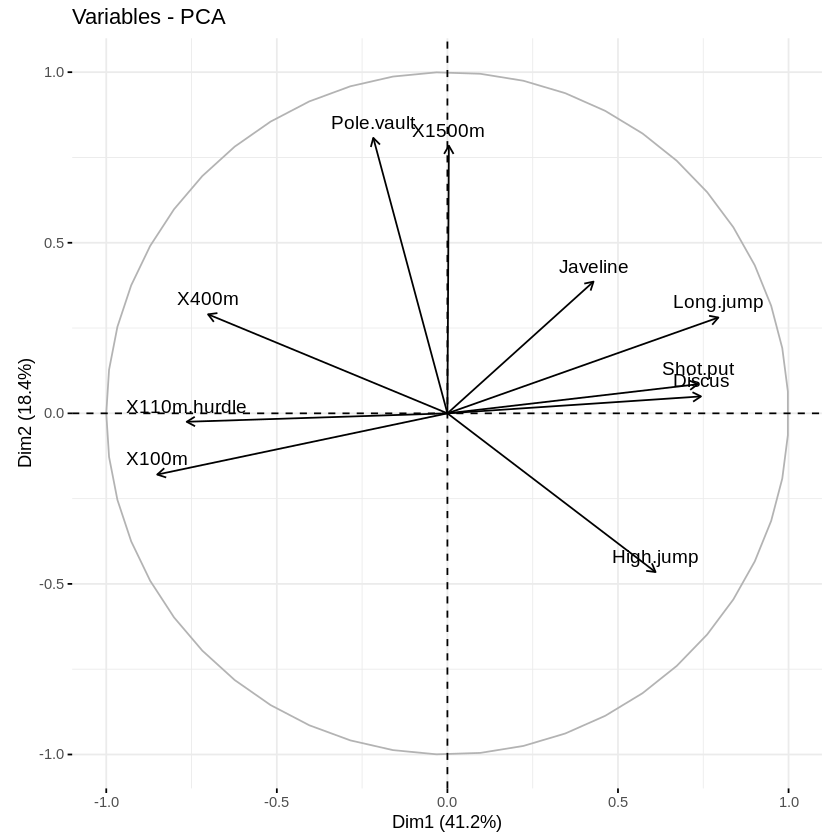

In [109]:
fviz_pca_var(res.pca, col.var = "black")

##Quality of representation

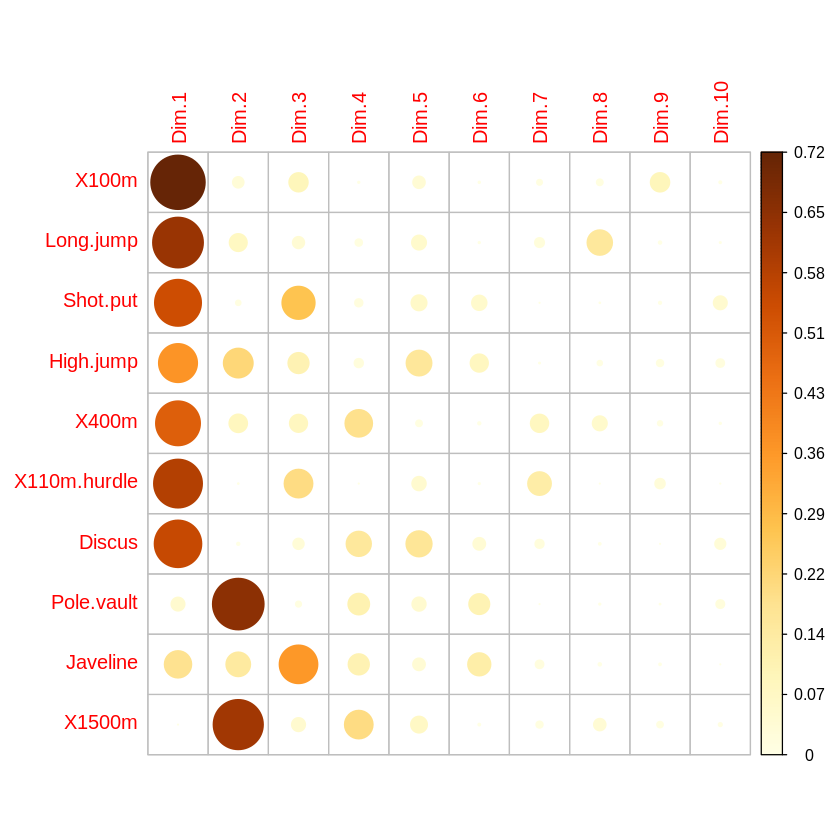

In [110]:
corrplot(var$cos2, is.corr=FALSE)

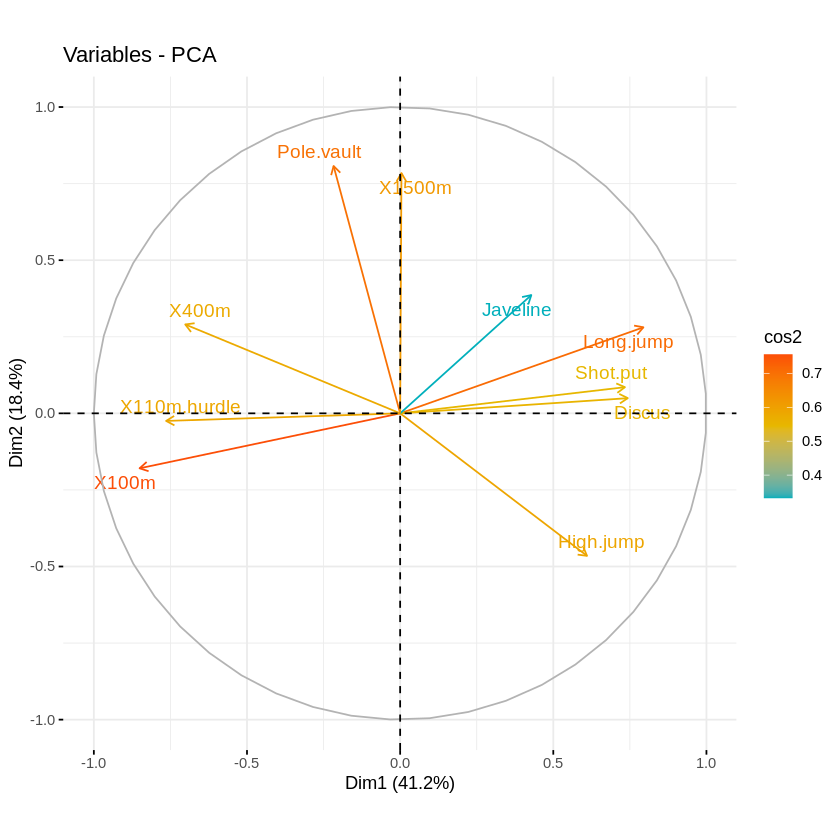

In [111]:
fviz_pca_var(res.pca, col.var = "cos2",
            gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
            repel = TRUE )

In [112]:
var$contrib

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
X100m,1.754429e+01,1.7505098,7.3386590,0.13755240,5.389252,0.295915322,2.75705260,3.99520353,59.1740009,1.61756139
Long.jump,1.529317e+01,4.2904162,2.9300944,1.62485936,7.748815,0.269003613,7.87159392,57.53322220,1.7146826,0.72414393
Shot.put,1.306014e+01,0.3967224,21.6204325,2.01407269,8.824401,13.596858744,0.03230371,0.21618512,1.4712015,38.76768578
High.jump,9.024811e+00,11.7715838,8.7928883,2.54987951,23.115504,19.159607001,0.26202607,2.59565787,8.1015517,14.62649091
X400m,1.193554e+01,4.5799296,6.4876363,22.65090599,1.539012,0.574509906,27.05274658,19.87344405,4.3489667,0.95730504
X110m.hurdle,1.415754e+01,0.0332933,16.2612611,0.03483735,7.166193,0.001638634,45.26163460,0.02537025,16.8579392,0.20028870
Discus,1.339309e+01,0.1341398,2.5147385,19.04132022,23.755756,9.321746508,6.73226823,0.57016606,0.1150295,24.42174410
Pole.vault,1.144592e+00,35.4618611,0.7139512,14.02307063,7.005084,25.357622290,0.03569883,0.39472201,0.4278065,15.43559151
Javeline,4.446377e+00,8.1086683,29.4531777,13.42963254,5.577615,31.004964393,5.89573984,1.01729950,1.0543458,0.01217993
X1500m,4.438531e-04,33.4728757,3.8871610,24.49386930,9.878367,0.418133591,4.09893563,13.77872941,6.7344755,3.23700871


Contributions of variables to PC1

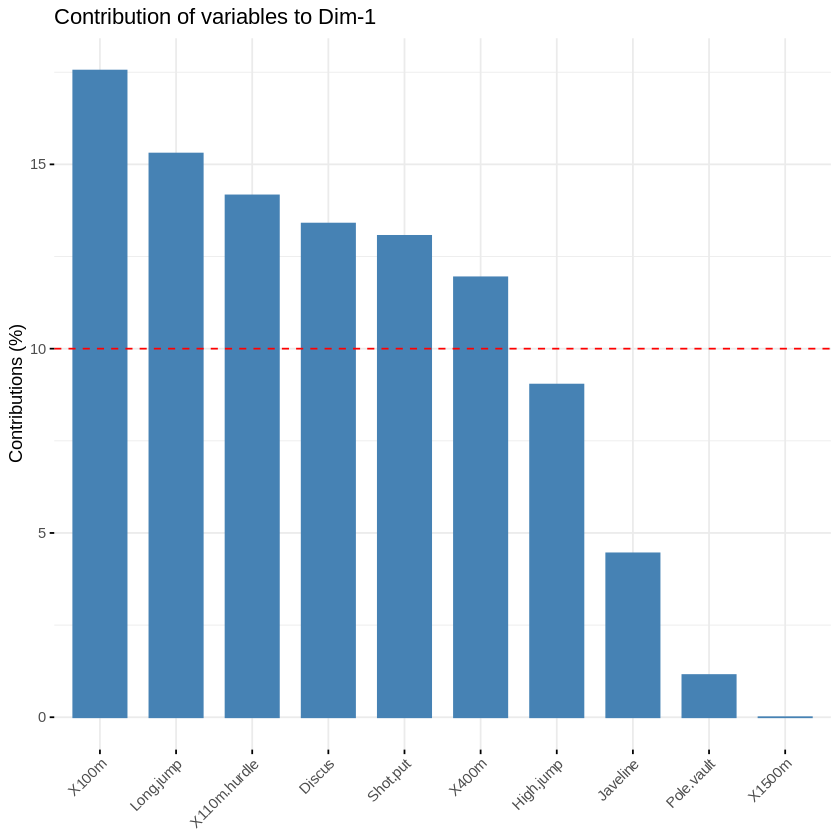

In [113]:
fviz_contrib(res.pca, choice = "var", axes = 1, top = 10)

Contributions of variables to PC2

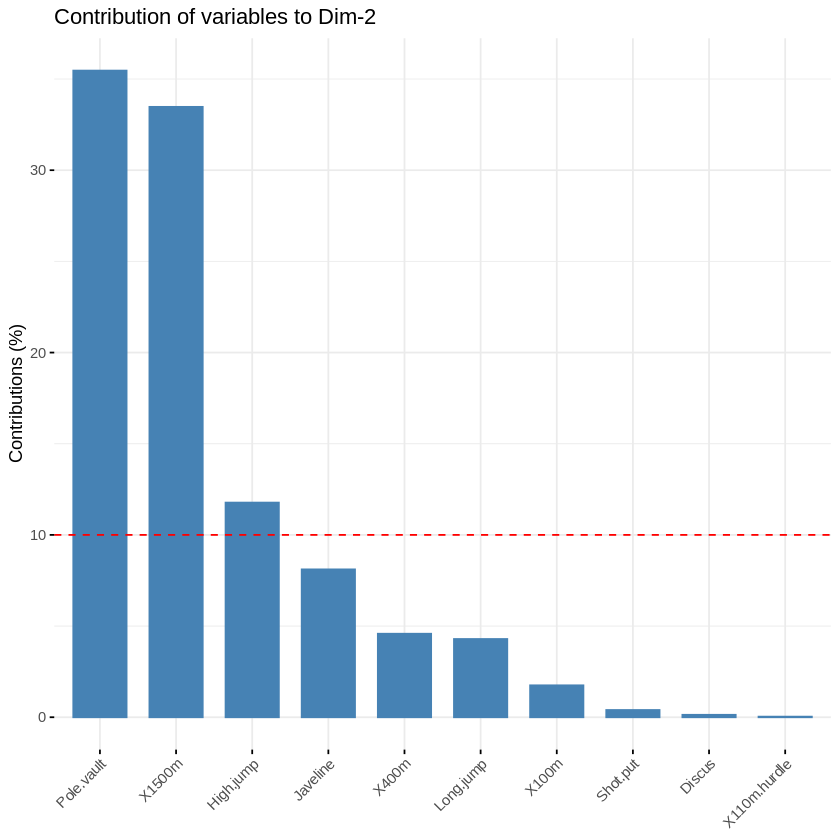

In [114]:
fviz_contrib(res.pca, choice = "var", axes = 2, top = 10)

##Graph of individuals

In [115]:
ind <- get_pca_ind(res.pca)
print(ind)

Principal Component Analysis Results for individuals
  Name       Description                       
1 "$coord"   "Coordinates for the individuals" 
2 "$cos2"    "Cos2 for the individuals"        
3 "$contrib" "contributions of the individuals"


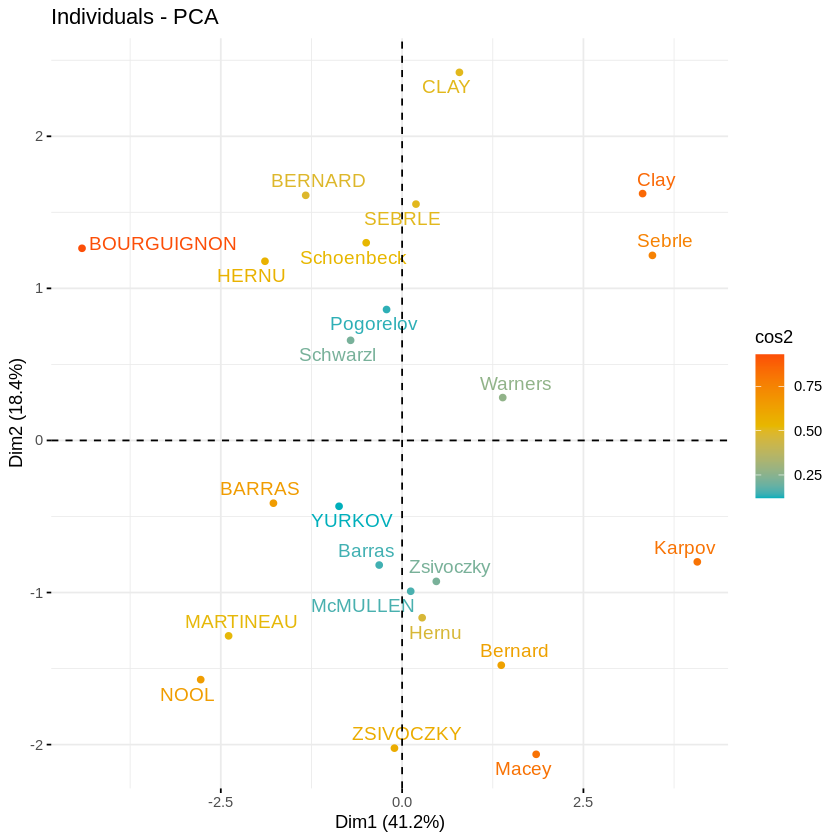

In [116]:
fviz_pca_ind(res.pca, col.ind = "cos2",
            gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
            repel = TRUE )

In [117]:
head(ind$coord)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
SEBRLE,0.1912074,1.5541282,-0.6283688,0.08205241,1.14261394,0.4638976,-0.20796012,0.04346057,-0.65934414,0.03273238
CLAY,0.7901217,2.4204156,1.3568870,1.26984296,-0.80684837,-1.3042002,-0.21291866,0.61724061,-0.06012536,-0.31716015
BERNARD,-1.3292592,1.6118687,-0.1961500,-1.92092203,0.08234282,0.4006287,-0.40643754,0.70385604,0.17008331,-0.09908142
YURKOV,-0.8694134,-0.4328779,-2.4739822,0.69723814,0.39885841,-0.1028634,-0.32487448,0.11499613,-0.10952404,-0.11969720
ZSIVOCZKY,-0.1057450,-2.0233632,1.3049312,-0.09929630,-0.19702411,-0.8955411,0.08825624,-0.20234130,-0.52310310,-0.34842265
McMULLEN,0.1185550,-0.9916237,0.8435582,1.31215266,1.58587086,-0.1865728,0.47828432,0.29308997,-0.10562320,-0.39317797


##Biplot

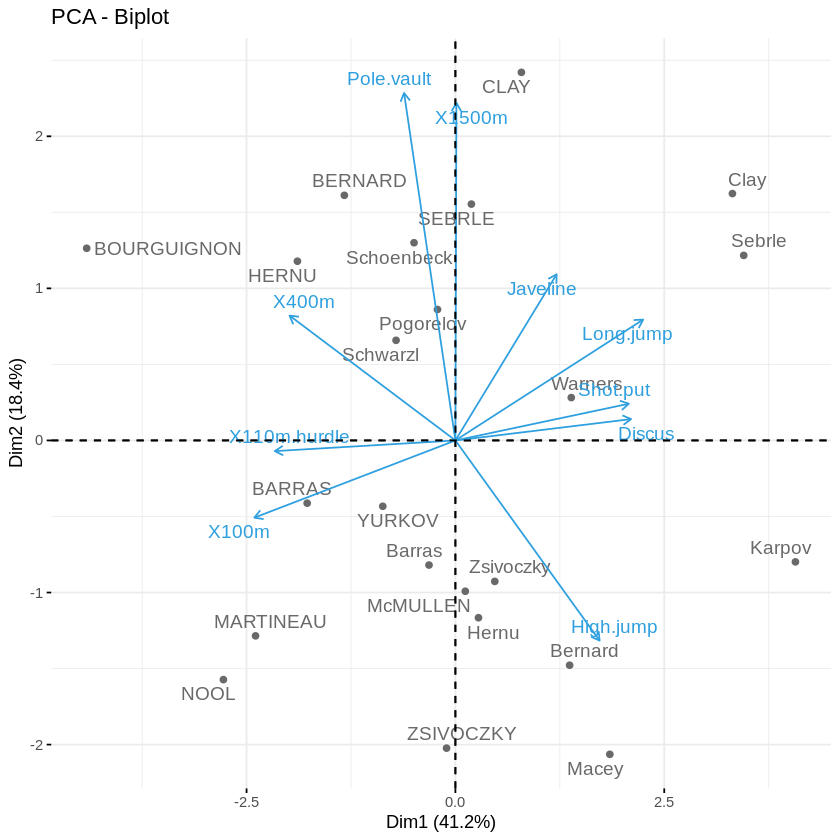

In [118]:
fviz_pca_biplot(res.pca, repel = TRUE,
                col.var = "#2E9FDF", # Variables color
                col.ind = "#696969" # Individuals color
                )

#Transform the new data by PCA

In [119]:
ind.sup = decathlon2[24:27, 1:10]
ind.sup.coord <- predict(res.pca, newdata = ind.sup)
print(ind.sup.coord )

               PC1         PC2       PC3        PC4         PC5       PC6
KARPOV   0.7772521  0.76237804 1.5971253  1.6863286 -0.73420295 0.8764709
WARNERS -0.3779697 -0.11891968 1.7005146 -0.6908084 -0.03159013 1.1580162
Nool    -0.5468405  1.93402211 0.4724184 -2.2283706 -0.24901831 0.5459418
Drews   -1.0848227  0.01703198 2.9818031 -1.5006207 -0.31924693 0.4645028
               PC7         PC8         PC9       PC10
KARPOV  -1.0746432  1.24674643 -1.09172761 -0.2155002
WARNERS -0.3181706 -0.41754716 -0.69099653  0.5251023
Nool    -0.4656852 -0.05883861  0.65860586 -0.2815011
Drews    0.3406706  0.01529952 -0.01678235 -0.1657992


## Supplementary elements

In [120]:
res.pca <- PCA(decathlon2, ind.sup = 24:27,
                quanti.sup = 11:12, quali.sup = 13, graph=FALSE)

Quantitative variables

In [121]:
res.pca$quanti.sup

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Rank,-0.7014777,-0.24519443,-0.1834294,0.05575186,-0.07382647
Points,0.9637075,0.07768262,0.1580225,-0.16623092,-0.03114711
,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Rank,-0.7014777,-0.24519443,-0.1834294,0.05575186,-0.07382647
Points,0.9637075,0.07768262,0.1580225,-0.16623092,-0.03114711
,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Rank,0.4920710,0.060120310,0.03364635,0.00310827,0.0054503477
Points,0.9287322,0.006034589,0.02497110,0.02763272,0.0009701427


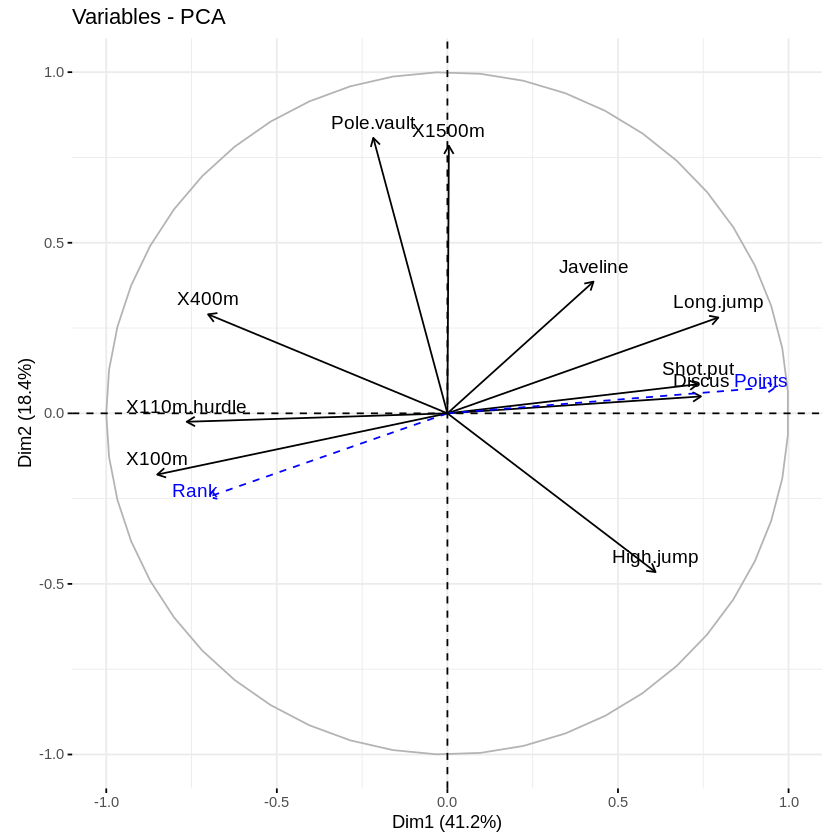

In [122]:
fviz_pca_var(res.pca)

## Individuals

Predicted results for the supplementary individuals (ind.sup)

In [123]:
res.pca$ind.sup

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
KARPOV,0.7947206,0.77951227,-1.6330203,1.7242283,-0.75070396
WARNERS,-0.3864645,-0.12159237,-1.7387332,-0.7063341,-0.03230011
Nool,-0.5591306,1.97748871,-0.4830358,-2.2784526,-0.25461493
Drews,-1.1092038,0.01741477,-3.0488182,-1.5343468,-0.32642192
,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
KARPOV,0.05104677,4.911173e-02,0.21553730,0.24028620,0.0455487744
WARNERS,0.02422707,2.398250e-03,0.49039677,0.08092862,0.0001692349
Nool,0.02897149,3.623868e-01,0.02162236,0.48108780,0.0060077529
Drews,0.09207094,2.269527e-05,0.69560547,0.17617609,0.0079736753
